In [1]:
from simply_nwb.pipeline import NWBSession
import matplotlib.pyplot as plt
%matplotlib qt

/home/felsenlab/GitHub/simply-nwb/simply_nwb/pipeline/enrichments/saccades/putative.py:64: SyntaxWarning: invalid escape sequence '\*'
  """


In [2]:
sess = NWBSession("predicted.nwb")

In [3]:

eyepos = sess.pull("PutativeSaccades.pose_reoriented")[:, 0]  # corrected, interpolated, reoriented and filtered
# eyepos = sess.pull("PutativeSaccades.raw_x")  # Raw unprocessed DLC (might not be the same length, confirm with above value shape)
nasal_peaks = sess.pull("PredictSaccades.saccades_predicted_nasal_peak_indices")
temporal_peaks = sess.pull("PredictSaccades.saccades_predicted_temporal_peak_indices")

print(f"Eyepos {eyepos.shape}")
print(f"Nasal {nasal_peaks.shape}")
print(f"Temporal {temporal_peaks.shape}")

Eyepos (571860,)
Nasal (251,)
Temporal (623,)


In [5]:
# Plot the eye position with the
fig, axs = plt.subplots(nrows=2, sharex=True)
axs[0].plot(eyepos)
for nas in nasal_peaks:
    axs[1].vlines(nas, -20, 15, color="blue")
for tmp in temporal_peaks:
    axs[1].vlines(tmp, -20, 15, color="orange")
plt.show()


In [4]:
# List available enrichments in this dataset
sess.available_enrichments()

['PredictSaccades', 'PutativeSaccades']

In [5]:
# List out the datasets we have available for a given enrichment
sess.available_keys("PredictSaccades")

['saccades_predicted_indices',
 'saccades_predicted_labels',
 'saccades_predicted_nasal_epochs',
 'saccades_predicted_nasal_waveforms',
 'saccades_predicted_temporal_epochs',
 'saccades_predicted_temporal_waveforms',
 'saccades_predicted_waveforms']

In [6]:
# Grab the saccade waveforms
all_waveforms = sess.pull("PredictSaccades.saccades_predicted_waveforms")

In [7]:
# Shape is (saccade num, time, x&y)
all_waveforms.shape

(1066, 80, 2)

In [8]:
# So to get all x saccades we can do
xwaves = all_waveforms[:, :, 0]

In [9]:
# Let's grab the predicted directions for these saccades
pred_dirs = sess.pull("PredictSaccades.saccades_predicted_labels")
pred_dirs

array([ 1., -1., -1., ...,  1.,  1.,  1.])

In [10]:
# Filter out nasal and temporal (1 is nasal)
nasal_xsaccades = xwaves[pred_dirs == 1]
temporal_xsaccades = xwaves[pred_dirs == -1]
print(f"We have {nasal_xsaccades.shape[0]} nasal saccades")
print(f"We have {temporal_xsaccades.shape[0]} temporal saccades")

We have 552 nasal saccades
We have 375 temporal saccades


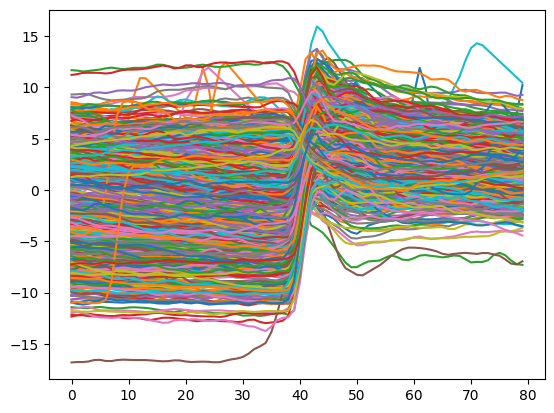

In [11]:
# Lets graph the nasal saccades
fig, ax = plt.subplots()
for saccade in nasal_xsaccades:
    ax.plot(saccade)
